In [2]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
import numpy as np
import requests
import os

<ErrorbarContainer object of 3 artists>

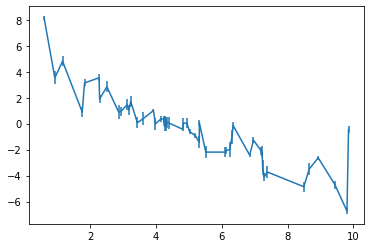

In [5]:
data = np.load('fit_exercise.npy')
plt.errorbar(data[0], data[1], yerr = data[2])

Con una malla uniforme:

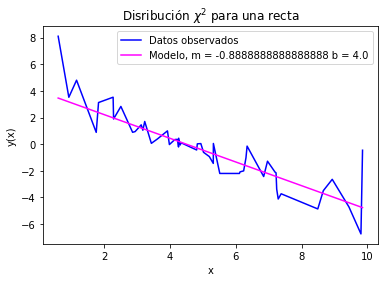

In [53]:
n = 10
y_mod =lambda m, b: m * x + b  

x, y = data[0], data[1]

m = np.linspace(-2, 0, n)
b = np.linspace(2, 8, n)

#aux = 0

results = []

for m_ in m:
    for b_ in b:
        x_sq_sum = 0
        x_sq = (y - y_mod(m_, b_))**2 
        for xs in x_sq:
            x_sq_sum += xs
        vec = [m_, b_, x_sq_sum]
        results.append(vec)

min_x = 10000
for res in results:
    if res[2] < min_x:
        min_x = res[2]
        min_ = res

min_
lab = 'Modelo, m = ' + str(min_[0]) + ' b = ' + str(min_[1])
plt.plot(data[0], data[1], color = 'blue', label = 'Datos observados')
plt.plot(data[0], y_mod(min_[0], min_[1]), color = 'magenta', label = lab)
plt.title('Disribución $\chi^2$ para una recta')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()

Con una malla a partir de números aleatorios:

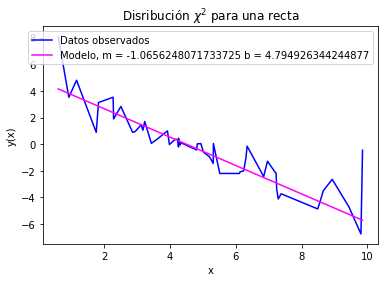

In [54]:
m = np.random.uniform(-2, 0, n)
b = np.random.uniform(2, 8, n)

#aux = 0

results = []

for m_ in m:
    for b_ in b:
        x_sq_sum = 0
        x_sq = (y - y_mod(m_, b_))**2 
        for xs in x_sq:
            x_sq_sum += xs
        vec = [m_, b_, x_sq_sum]
        results.append(vec)

min_x = 10000
for res in results:
    if res[2] < min_x:
        min_x = res[2]
        min_ = res

min_
lab = 'Modelo, m = ' + str(min_[0]) + ' b = ' + str(min_[1])
plt.plot(data[0], data[1], color = 'blue', label = 'Datos observados')
plt.plot(data[0], y_mod(min_[0], min_[1]), color = 'magenta', label = lab)
plt.title('Disribución $\chi^2$ para una recta')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()